In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import folium
import plotly.express as px
import plotly.graph_objs as go
from folium.plugins import MarkerCluster
import plotly.io as pio
from plotly.subplots import make_subplots
from config import PROJECT_ROOT

import sys
sys.path.append(PROJECT_ROOT)

In [3]:
from src.utils.data_loader import load_data
from src.models.risk_assessment import DengueRiskAssessment

In [4]:
data = load_data('data/featured_data.csv')

In [5]:
# Risk assessment
risk = DengueRiskAssessment(data)

In [6]:
# Calculate city risk scores
city_risks = risk.calculate_city_risk_scores()

In [27]:
city_risks.head()

,city,precipitation_sum_7d_std_mean,precipitation_sum_7d_std_std,wind_speed_10m_max_7d_std_mean,wind_speed_10m_max_7d_std_std,temperature_2m_min_7d_std_mean,temperature_2m_min_7d_std_std,temperature_2m_max_14d_std_mean,temperature_2m_max_14d_std_std,temperature_2m_min_14d_std_mean,...,wind_speed_10m_max_14d_std_std,wind_speed_10m_max_mean,wind_speed_10m_max_std,precipitation_sum_mean,precipitation_sum_std,arbovirus_bool_mean,arbovirus_bool_sum,arbovirus_bool_count,risk_score,risk_category
0,Beyla,6.792207,9.257226,0.767717,0.686001,1.080136,1.078934,0.948322,0.672778,1.344872,...,0.677103,4.746825,2.865456,37.349376,33.352300,0.148019,1188.0,8026,44.489289,Low
1,Boffa,6.495785,9.023522,0.734569,0.678349,1.049531,1.072819,0.908184,0.637215,1.336106,...,0.663722,4.398668,2.786114,39.950127,32.088706,0.151047,1212.0,8024,36.363069,Low
2,Boké,4.920412,8.248185,0.574320,0.666909,0.820264,1.047135,0.770007,0.710950,1.080947,...,0.706601,4.005209,2.733598,45.711266,33.425973,0.207423,2079.0,10023,0.000000,Low
3,Conakry,7.202122,9.507440,0.773294,0.677789,1.193424,1.143190,0.937832,0.674591,1.411237,...,0.673971,5.782541,2.829314,24.030631,29.438856,0.036748,268.0,7293,56.278800,Low
4,Coyah,7.208147,9.674492,0.773876,0.705367,1.171853,1.165470,0.922161,0.690057,1.413166,...,0.697742,5.926860,2.911721,23.895815,29.531488,0.063529,440.0,6926,55.722811,Low


In [ ]:
risk_report = risk.generate_risk_report()

In [12]:
cities_info = load_csv('data/cities_info.csv')

# Merge datasets on the 'city' column
risk_df = pd.merge(city_risks, cities_info[['city', 'latitude', 'longitude']], on='city', how='left')

In [14]:
from src.visualization.risk_viz import create_folium_risk_map, create_interactive_risk_choropleth, risk_correlations, weather_impact_analysis

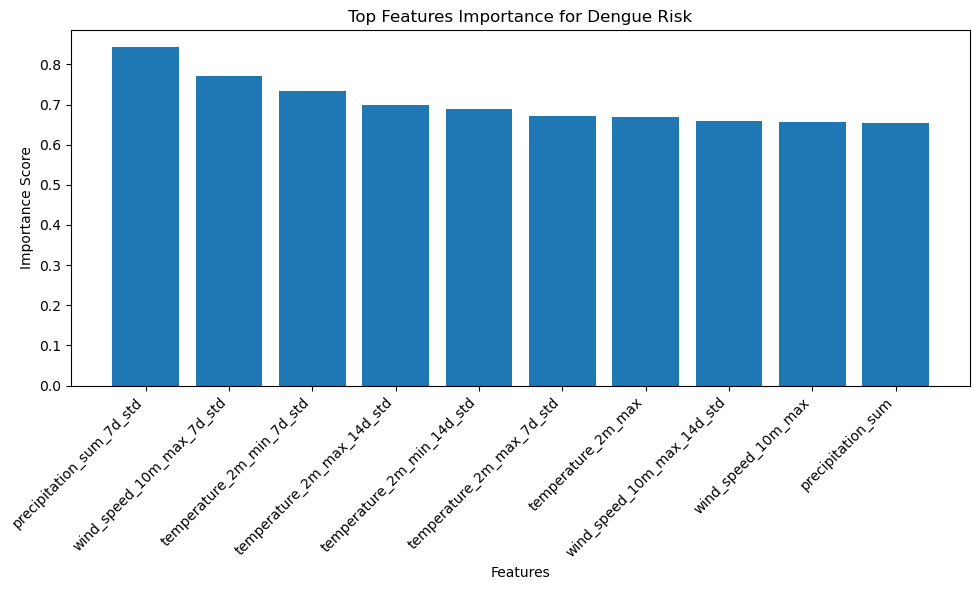

In [21]:
top_features = risk.feature_importances['top_features']

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(top_features.keys(), top_features.values())
plt.title('Top Features Importance for Dengue Risk')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [15]:
risk_map = create_folium_risk_map(risk_df)
risk_map

In [17]:
# Create visualizations
risk_choropleth = create_interactive_risk_choropleth(risk_df)
risk_choropleth